# Pd nr 3 - Ablation study

## 1. Czym jest <em>Ablation study</em>?
<em>Ablation study</em> jest pojeciem, które swoje początki miało w badaniach psychologcznych oraz medycznych. Jest to metoda, w której role i funkcje tkanek i organów organizmów żywych były odkrywane poprzez ich usuwanie i obserwowanie tego jak organizm się zachowuje pod ich nieobecność. Już nawet definicja z dziedzin tak odległych od uczenia maszynowego pozwala nam złapać intuicje, jakie ona moze mieć zastosowanie w przypadku problemów ML-owych. W kontekście uczenia maszynowego mozemy zdefiniować <em> ablation study </em> jako sprawdzanie działania architektur ML-owych poprzez usuwanie pewnych jej elemntów w celu zdobycia informacji na temat ich działania, a także ich wpływu na wydajność modelu.

## 2. <em>Ablation study</em> na wybranej sieci CNN

In [53]:
import numpy as np
import tensorflow as tf

import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [54]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

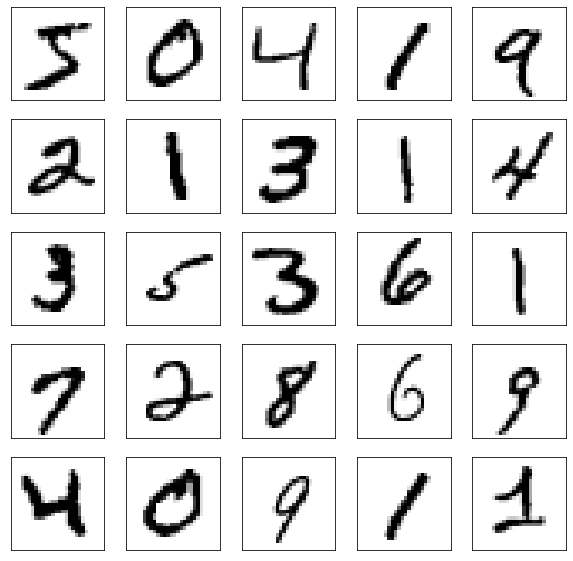

In [55]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

## 2.1. Startowa architektura

In [56]:
def plot_model_per_epoch(fitted_model):
  table = pd.DataFrame.from_dict(fitted_model.history).reset_index().drop(["index"], axis = 1)
  plt.figure(figsize = (20,10))
  plt.plot(table['index'], table['accuracy'], color = 'skyblue', label = 'accuracy')
  plt.plot(table['index'], table['val_accuracy'], color = 'orange', label = 'test accuracy')
  plt.grid(alpha = 0.2)
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(prop={'size': 20})
  plt.show()

In [57]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [58]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 3, 3, 32)          18464     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 32)               

In [59]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

fitted_model = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 39s 91ms/step - loss: 1.2978 - accuracy: 0.5615 - val_loss: 0.1965 - val_accuracy: 0.9468
Epoch 2/5
422/422 [==============================] - 38s 91ms/step - loss: 0.4905 - accuracy: 0.8381 - val_loss: 0.1229 - val_accuracy: 0.9648
Epoch 3/5
422/422 [==============================] - 38s 91ms/step - loss: 0.3813 - accuracy: 0.8765 - val_loss: 0.0954 - val_accuracy: 0.9713
Epoch 4/5
422/422 [==============================] - 38s 90ms/step - loss: 0.3278 - accuracy: 0.8921 - val_loss: 0.0790 - val_accuracy: 0.9763
Epoch 5/5
422/422 [==============================] - 38s 91ms/step - loss: 0.2789 - accuracy: 0.9082 - val_loss: 0.0773 - val_accuracy: 0.9780


In [60]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.0849137157201767
Test accuracy: 0.9760000109672546


## 2.2. Dodawanie/usuwanie warstwy

Porównamy wyniki po usunięciu jednej warstwy z 32 neuronami.

In [61]:
model_1 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)              

In [63]:
batch_size = 128
epochs = 5

model_1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

fitted_model_1 = model_1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 38s 89ms/step - loss: 0.7640 - accuracy: 0.7693 - val_loss: 0.0830 - val_accuracy: 0.9777
Epoch 2/5
422/422 [==============================] - 37s 89ms/step - loss: 0.1174 - accuracy: 0.9640 - val_loss: 0.0631 - val_accuracy: 0.9827
Epoch 3/5
422/422 [==============================] - 37s 88ms/step - loss: 0.0856 - accuracy: 0.9747 - val_loss: 0.0468 - val_accuracy: 0.9862
Epoch 4/5
422/422 [==============================] - 37s 89ms/step - loss: 0.0689 - accuracy: 0.9787 - val_loss: 0.0386 - val_accuracy: 0.9905
Epoch 5/5
422/422 [==============================] - 37s 88ms/step - loss: 0.0544 - accuracy: 0.9826 - val_loss: 0.0371 - val_accuracy: 0.9902


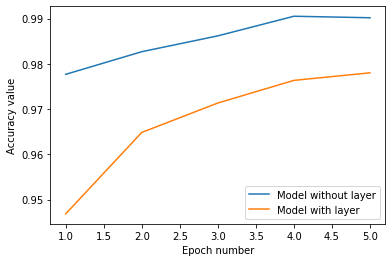

In [70]:
model_info = pd.DataFrame.from_dict(fitted_model.history).reset_index().drop(["index"], axis = 1)
model_info_1 = pd.DataFrame.from_dict(fitted_model_1.history).reset_index().drop(["index"], axis = 1)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(model_info_1.index + 1, model_info_1['val_accuracy'], label = 'Model without layer')
ax1.plot(model_info.index + 1, model_info['val_accuracy'], label = 'Model with layer')
plt.legend(loc="lower right")
plt.title("Porównanie accuracy na zbiorze walidayjnym")
plt.ylabel('Accuracy value')
plt.xlabel('Epoch number')
plt.show()

Widzimy, że w przypadku zbioru MNISTowego accuracy na zbiroze walidacyjnym jest wyzszy niż na treningowym. Może to wynika z mniejszego overfittingu spowodowanego mniejszą ilością warstw, sprawdźmy jak sytuacja wyglaa na trainie.

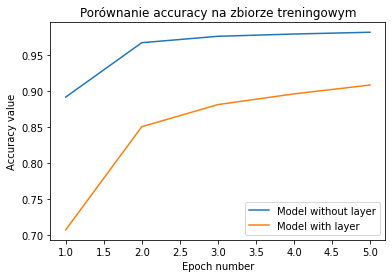

In [72]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(model_info_1.index + 1, model_info_1['accuracy'], label = 'Model without layer')
ax1.plot(model_info.index + 1, model_info['accuracy'], label = 'Model with layer')
plt.legend(loc="lower right")
plt.title("Porównanie accuracy na zbiorze treningowym")
plt.ylabel('Accuracy value')
plt.xlabel('Epoch number')
plt.show()

Jednak wniosek o overfittingu na zbiorze treningowym jest błeny. Widzimy, że po prostu w przypadku używanego zbiorku odjecie warstwy ma pozytywny wpływ na wyniki.

## 2.3. Zmiana parametrów *warstw*

Porównamy wyniki po zmienieniu liczby neuronów w jednej z warstw z 64 na 32 neurony.

In [73]:
model_2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 32)              

In [74]:
batch_size = 128
epochs = 5

model_2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

fitted_model_2 = model_2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 32s 76ms/step - loss: 1.4060 - accuracy: 0.5202 - val_loss: 0.1994 - val_accuracy: 0.9475
Epoch 2/5
422/422 [==============================] - 32s 75ms/step - loss: 0.4993 - accuracy: 0.8426 - val_loss: 0.1250 - val_accuracy: 0.9662
Epoch 3/5
422/422 [==============================] - 32s 75ms/step - loss: 0.3830 - accuracy: 0.8798 - val_loss: 0.1100 - val_accuracy: 0.9677
Epoch 4/5
422/422 [==============================] - 32s 75ms/step - loss: 0.3334 - accuracy: 0.8936 - val_loss: 0.0982 - val_accuracy: 0.9728
Epoch 5/5
422/422 [==============================] - 32s 76ms/step - loss: 0.2983 - accuracy: 0.9060 - val_loss: 0.0897 - val_accuracy: 0.9752


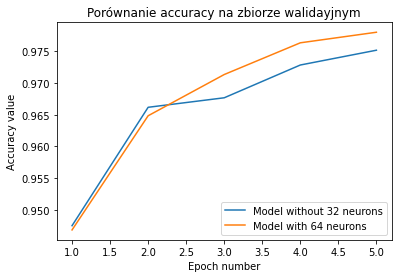

In [76]:
model_info_2 = pd.DataFrame.from_dict(fitted_model_2.history).reset_index().drop(["index"], axis = 1)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(model_info_2.index + 1, model_info_2['val_accuracy'], label = 'Model without 32 neurons')
ax1.plot(model_info.index + 1, model_info['val_accuracy'], label = 'Model with 64 neurons')
plt.legend(loc="lower right")
plt.title("Porównanie accuracy na zbiorze walidayjnym")
plt.ylabel('Accuracy value')
plt.xlabel('Epoch number')
plt.show()

Tutaj z kolei widzimy, ze uproszczenie architektury (przynajmniej dla tych 5 rozważanych epok) ma negatywny wpływ na wyniki.

## 2.4. Zmiana parametrów treningu

Zmienimy zarówno funkcję kosztu, jak i rozmiar batcha - zobaczymy jak to się przekłada na wyniki.

In [77]:
batch_size = 64
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

fitted_model_3 = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 43s 50ms/step - loss: 0.2725 - accuracy: 0.9100 - val_loss: 0.0700 - val_accuracy: 0.9785
Epoch 2/5
844/844 [==============================] - 42s 50ms/step - loss: 0.2511 - accuracy: 0.9167 - val_loss: 0.0651 - val_accuracy: 0.9800
Epoch 3/5
844/844 [==============================] - 42s 50ms/step - loss: 0.2366 - accuracy: 0.9231 - val_loss: 0.0662 - val_accuracy: 0.9812
Epoch 4/5
844/844 [==============================] - 42s 50ms/step - loss: 0.2129 - accuracy: 0.9306 - val_loss: 0.0716 - val_accuracy: 0.9813
Epoch 5/5
844/844 [==============================] - 42s 50ms/step - loss: 0.1970 - accuracy: 0.9347 - val_loss: 0.0617 - val_accuracy: 0.9830


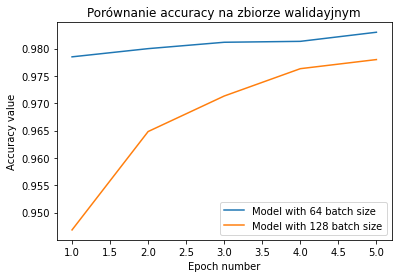

In [79]:
model_info_3 = pd.DataFrame.from_dict(fitted_model_3.history).reset_index().drop(["index"], axis = 1)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(model_info_3.index + 1, model_info_3['val_accuracy'], label = 'Model with 64 batch size')
ax1.plot(model_info.index + 1, model_info['val_accuracy'], label = 'Model with 128 batch size')
plt.legend(loc="lower right")
plt.title("Porównanie accuracy na zbiorze walidayjnym")
plt.ylabel('Accuracy value')
plt.xlabel('Epoch number')
plt.show()

In [82]:
batch_size = 128
epochs = 5

model.compile(loss="poisson", optimizer="adam", metrics=["accuracy"])

fitted_model_4 = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 40s 94ms/step - loss: 0.1188 - accuracy: 0.9387 - val_loss: 0.1056 - val_accuracy: 0.9847
Epoch 2/5
422/422 [==============================] - 40s 94ms/step - loss: 0.1182 - accuracy: 0.9399 - val_loss: 0.1054 - val_accuracy: 0.9843
Epoch 3/5
422/422 [==============================] - 40s 94ms/step - loss: 0.1169 - accuracy: 0.9422 - val_loss: 0.1057 - val_accuracy: 0.9845
Epoch 4/5
422/422 [==============================] - 40s 94ms/step - loss: 0.1168 - accuracy: 0.9439 - val_loss: 0.1057 - val_accuracy: 0.9847
Epoch 5/5
422/422 [==============================] - 40s 94ms/step - loss: 0.1156 - accuracy: 0.9462 - val_loss: 0.1058 - val_accuracy: 0.9853


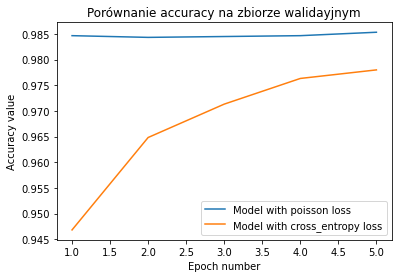

In [83]:
model_info_4 = pd.DataFrame.from_dict(fitted_model_4.history).reset_index().drop(["index"], axis = 1)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(model_info_4.index + 1, model_info_4['val_accuracy'], label = 'Model with poisson loss')
ax1.plot(model_info.index + 1, model_info['val_accuracy'], label = 'Model with cross_entropy loss')
plt.legend(loc="lower right")
plt.title("Porównanie accuracy na zbiorze walidayjnym")
plt.ylabel('Accuracy value')
plt.xlabel('Epoch number')
plt.show()

Widzimy, że funkcja kosztu poisson poradziłą sobie sporo lepiej - szybkosć zbieżnosci dużo szybasz, już od pierwszej epoki obserwujemy lepsze wyniki.

## 2.5. Zmiana funkcji wyjściowej



In [84]:
model_5 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)

model_5.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 3, 3, 32)          18464     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 32)              

In [85]:
batch_size = 128
epochs = 5

model_5.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

fitted_model_5 = model_5.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 40s 95ms/step - loss: 1.3113 - accuracy: 0.5539 - val_loss: 0.1668 - val_accuracy: 0.9532
Epoch 2/5
422/422 [==============================] - 40s 94ms/step - loss: 0.4103 - accuracy: 0.8690 - val_loss: 0.1094 - val_accuracy: 0.9702
Epoch 3/5
422/422 [==============================] - 40s 95ms/step - loss: 0.3280 - accuracy: 0.8973 - val_loss: 0.0931 - val_accuracy: 0.9743
Epoch 4/5
422/422 [==============================] - 40s 95ms/step - loss: 0.2732 - accuracy: 0.9140 - val_loss: 0.0758 - val_accuracy: 0.9795
Epoch 5/5
422/422 [==============================] - 40s 94ms/step - loss: 0.2461 - accuracy: 0.9215 - val_loss: 0.0661 - val_accuracy: 0.9807


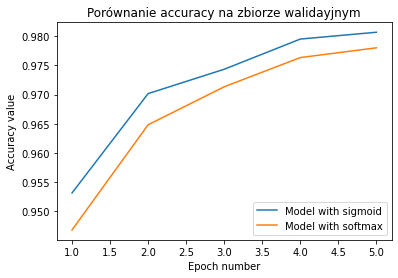

In [86]:
model_info_5 = pd.DataFrame.from_dict(fitted_model_5.history).reset_index().drop(["index"], axis = 1)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(model_info_5.index + 1, model_info_5['val_accuracy'], label = 'Model with sigmoid')
ax1.plot(model_info.index + 1, model_info['val_accuracy'], label = 'Model with softmax')
plt.legend(loc="lower right")
plt.title("Porównanie accuracy na zbiorze walidayjnym")
plt.ylabel('Accuracy value')
plt.xlabel('Epoch number')
plt.show()

## 3. Podsumowanie

Widzimy, że o ile metoda <em> Ablation study </em> nie jest może najlepszą możliwą, bo widzimy tylko pewne efekty zmien, a nie rozumiemy co dokładnie za nimi stoi, ale pozwala nam to złapać chociaż jakąkolwiek intuicję, która w obcowaniu z sieciami jest niezbędna - zwłaszcza w bardziej skomplikowanych architekturach.